In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Exploring the dataset

In [2]:
# Loading the dataset
maternal_health_risk_data = pd.read_csv('Maternal Health Risk Data Set.csv')

In [3]:
maternal_health_risk_data.shape

(1014, 7)

In [4]:
maternal_health_risk_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
maternal_health_risk_data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [6]:
maternal_health_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [7]:
maternal_health_risk_data.describe(include='all')

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,low risk
freq,NaN,NaN,NaN,NaN,NaN,NaN,406
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,NaN
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,NaN
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,NaN
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,NaN
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,NaN
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,NaN


In [8]:
# Checking which columns contain missing values
maternal_health_risk_data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [9]:
# Changing the categorical values to numerical
maternal_health_risk_data['RiskLevel'] = maternal_health_risk_data['RiskLevel'].\
                                                replace(['low risk','mid risk', 'high risk'],[0,1,2])
maternal_health_risk_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


/Users/lateefatamuda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RiskLevel', ylabel='count'>

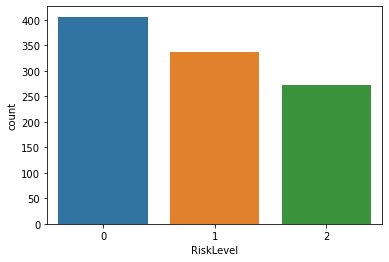

In [10]:
# Visualizing the Class labels
sns.countplot(maternal_health_risk_data['RiskLevel'])

In [11]:
maternal_health_risk_data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,0.867850
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.807353
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


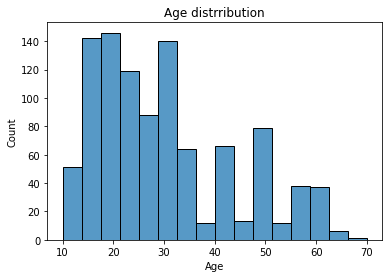

In [12]:
# Plotting the Age distribution of dataset
sns.histplot(maternal_health_risk_data.Age)
plt.title('Age distrribution')
plt.show()

In [13]:
# Separating the class feature(y) and input features(X)
X = (maternal_health_risk_data.drop('RiskLevel', axis=1)).values
y = (maternal_health_risk_data['RiskLevel']).values

In [14]:
# Splitting the dataset into the Training set and the Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [15]:
X_train.shape

(760, 6)

In [16]:
# Standardizing the Training and Test dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

### Classification

In [17]:
# Fitting the Training set using the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train_s, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_s)
print(y_pred)

[0 1 0 2 1 2 2 2 0 0 0 1 0 0 0 0 1 2 2 0 1 0 0 1 0 2 1 1 0 1 1 2 1 2 1 1 2
 1 1 2 0 0 0 1 1 0 2 0 0 0 1 1 1 2 1 1 2 2 0 1 0 2 2 0 2 0 0 1 2 0 1 2 1 1
 1 0 1 0 1 0 1 0 2 1 0 1 0 2 0 2 0 1 1 0 1 0 1 1 1 2 2 2 0 0 1 1 0 0 0 2 0
 2 1 2 1 2 1 2 1 2 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 2 1 0 1 1
 0 1 2 0 1 2 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 2 0 2 0 1 2 2 1 0 0 2 2 1 2 2 1
 2 1 1 2 1 1 2 1 1 1 2 1 0 0 1 0 0 2 2 1 2 1 2 1 0 0 2 2 1 2 2 0 0 1 1 0 2
 1 0 1 1 1 1 0 0 2 0 0 2 0 1 0 0 2 1 2 1 2 0 0 0 1 2 2 1 1 1 0 0]


In [20]:
print(y_test)

[0 1 0 2 1 2 2 2 0 0 0 1 0 1 0 0 1 2 2 0 1 0 1 2 1 1 1 1 1 1 2 1 1 2 1 1 2
 1 2 2 0 0 0 1 1 0 2 0 0 0 1 0 2 2 1 1 2 2 0 2 0 2 2 0 2 1 0 1 2 0 1 2 1 0
 1 0 1 0 1 0 1 2 0 0 0 1 0 2 0 2 0 2 1 0 2 0 1 1 1 2 2 1 0 0 0 1 0 1 1 1 0
 2 1 0 1 2 0 2 1 2 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 2 1 0 1 1
 1 1 1 0 0 2 0 0 0 0 0 1 0 1 1 2 0 0 1 0 0 2 1 1 1 1 2 2 1 0 2 2 0 1 2 2 1
 2 0 2 2 1 1 2 0 1 2 2 1 0 0 1 0 0 2 2 1 2 1 2 1 0 2 2 2 1 0 2 0 0 0 1 0 2
 2 0 1 0 0 0 0 0 2 0 0 2 0 1 0 1 1 1 2 0 2 0 1 0 1 2 2 1 2 1 1 0]


In [21]:
# Evaluating the performance of the model
from sklearn import metrics

acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))

cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm, '\n\n')
print('---------------------------------------------')

result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.78


Confusion Matrix:
[[75 16  4]
 [15 70  7]
 [ 3 12 52]] 


---------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        95
           1       0.71      0.76      0.74        92
           2       0.83      0.78      0.80        67

    accuracy                           0.78       254
   macro avg       0.78      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254



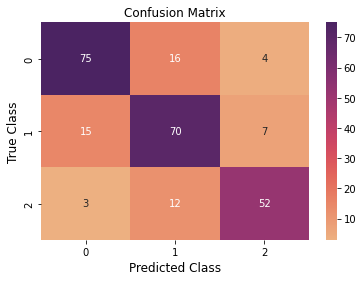

In [22]:
# Visualizing the confusion matrix
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')

plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)

plt.show()